## Necessary imports

In [331]:
import torch
import time
import scipy.linalg as sclg
from torchvision import datasets, transforms
import importlib
import helpers
importlib.reload(helpers)
from helpers import *

## Model definition (MNIST)
Declaration of a simple fully connected neural network (MLP) with 4 linear layers

In [273]:
class MNIST_model(torch.nn.Module):
	def __init__(self, d_in, K, d_out):
		""" Initialization of the MLP
			INPUT : 
				d_in= int (total number of features (i.e. pixels) of the images)
				K= int (hidden dimension of the layers in the NN)
				d_out= int (number of classes in the classification problem)
		"""
		super().__init__()
		self.input_layer = torch.nn.Linear(d_in, K) 
		self.input_phi = torch.nn.ReLU()
		self.layer1 = torch.nn.Linear(K,K)
		self.phi1 = torch.nn.ReLU()
		self.layer2 = torch.nn.Linear(K,K)
		self.phi2 = torch.nn.ReLU()
		self.output_layer = torch.nn.Linear(K,d_out)

	def forward(self, Z):
		""" Forward pass of the network
			INPUT  : 
				Z= batch of n 28 by 28 pixels images (torch tensor of shape (n, 28, 28))
			OUTPUT : 
				f(Z)= torch tensor f(Z) (effect of the MLP on Z) of shape (n, d_out)
		"""
		Z = torch.flatten(Z, 1)
		Z = self.input_layer(Z)
		Z = self.input_phi(Z)
		Z = self.layer1(Z)
		Z = self.phi1(Z)
		Z = self.layer2(Z)
		Z = self.phi2(Z)
		Z = self.output_layer(Z)
		return Z
	
	def compute_proba(self, output) :
		return torch.nn.functional.softmax(output, dim= 1)

# Initializing and Training the model

### Training with Adam

Train Epoch: 1-0 batch_loss=3.84e-02 batch_acc=0.067
Train Epoch: 1-100 batch_loss=2.84e-02 batch_acc=0.767
Train Epoch: 1-200 batch_loss=2.87e-02 batch_acc=0.750
Train Epoch: 1-300 batch_loss=2.77e-02 batch_acc=0.800
Train Epoch: 1-400 batch_loss=2.67e-02 batch_acc=0.883
Train Epoch: 1-500 batch_loss=2.69e-02 batch_acc=0.850
Train Epoch: 1-600 batch_loss=2.76e-02 batch_acc=0.800
Train Epoch: 1-700 batch_loss=2.64e-02 batch_acc=0.867
Train Epoch: 1-800 batch_loss=2.55e-02 batch_acc=0.933
Train Epoch: 1-900 batch_loss=2.49e-02 batch_acc=0.983
Test set: Average loss: 0.5059, Accuracy: 9219/10000 (92%)
Train Epoch: 2-0 batch_loss=2.60e-02 batch_acc=0.900
Train Epoch: 2-100 batch_loss=2.50e-02 batch_acc=0.967
Train Epoch: 2-200 batch_loss=2.54e-02 batch_acc=0.933
Train Epoch: 2-300 batch_loss=2.66e-02 batch_acc=0.850
Train Epoch: 2-400 batch_loss=2.59e-02 batch_acc=0.900
Train Epoch: 2-500 batch_loss=2.49e-02 batch_acc=0.967
Train Epoch: 2-600 batch_loss=2.53e-02 batch_acc=0.950
Train Epoc

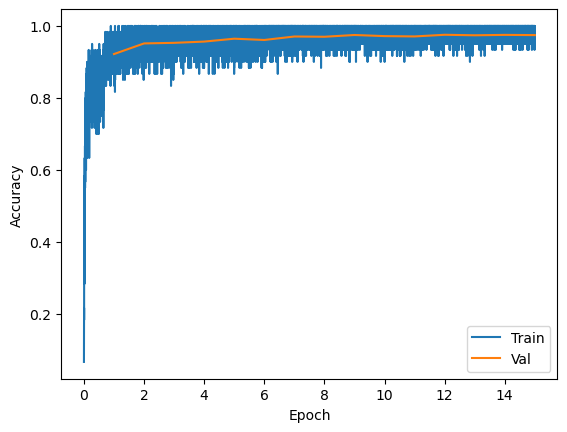

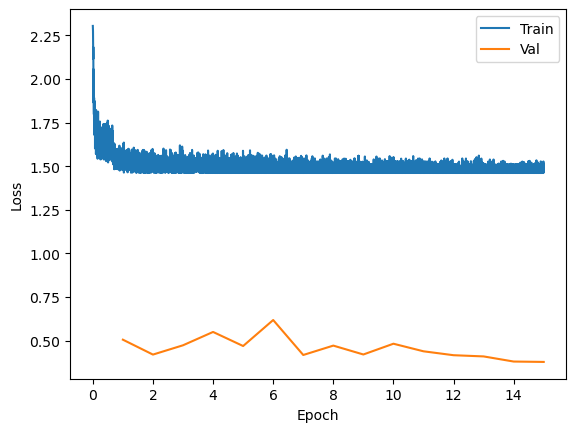

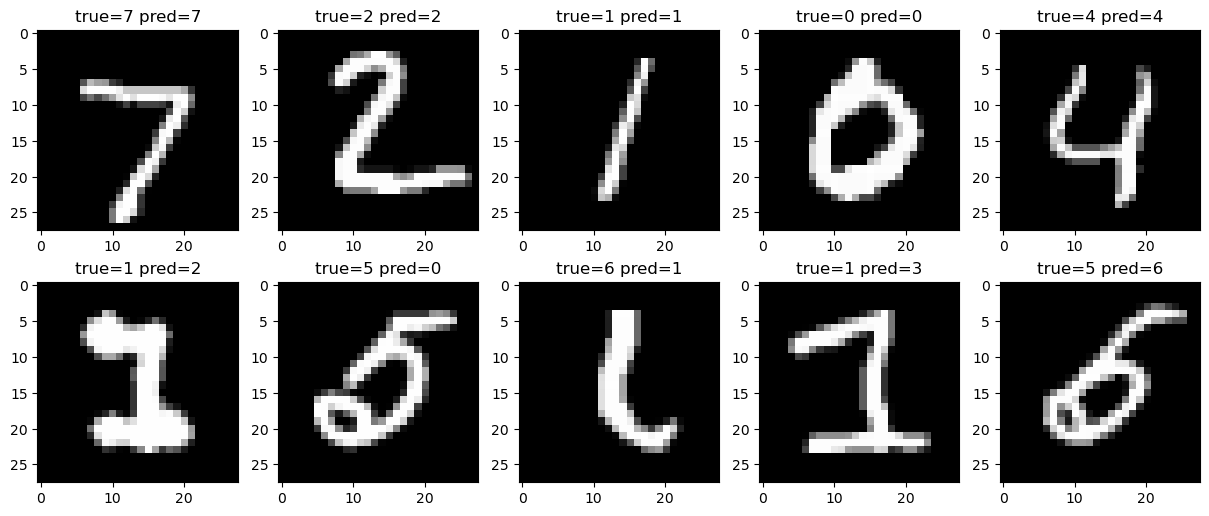

In [302]:
model= MNIST_model(28*28, 128, 10)
weights_start= get_weights(model)

# The train set has a total of 60000 images
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

optimization_algo= torch.optim.Adam

lr = 1e-3
batch_size = 60 # The train set has 60000 images
num_epochs = 15

t1= time.perf_counter()
M= run_mnist_training(model, num_epochs, lr, batch_size, device, optimization_algo)
print("Total Training Time : ", time.perf_counter() - t1, " s")
weights_= get_weights(model)


### Training with SGD

Train Epoch: 1-0 batch_loss=3.84e-02 batch_acc=0.067
Train Epoch: 1-100 batch_loss=3.82e-02 batch_acc=0.333
Train Epoch: 1-200 batch_loss=3.74e-02 batch_acc=0.167
Train Epoch: 1-300 batch_loss=3.30e-02 batch_acc=0.450
Train Epoch: 1-400 batch_loss=2.96e-02 batch_acc=0.717
Train Epoch: 1-500 batch_loss=2.92e-02 batch_acc=0.700
Train Epoch: 1-600 batch_loss=3.08e-02 batch_acc=0.617
Train Epoch: 1-700 batch_loss=2.95e-02 batch_acc=0.683
Train Epoch: 1-800 batch_loss=2.85e-02 batch_acc=0.750
Train Epoch: 1-900 batch_loss=2.86e-02 batch_acc=0.750
Test set: Average loss: 2.3359, Accuracy: 7631/10000 (76%)
Train Epoch: 2-0 batch_loss=2.91e-02 batch_acc=0.717
Train Epoch: 2-100 batch_loss=2.79e-02 batch_acc=0.783
Train Epoch: 2-200 batch_loss=2.78e-02 batch_acc=0.783
Train Epoch: 2-300 batch_loss=2.88e-02 batch_acc=0.733
Train Epoch: 2-400 batch_loss=2.86e-02 batch_acc=0.750
Train Epoch: 2-500 batch_loss=2.66e-02 batch_acc=0.867
Train Epoch: 2-600 batch_loss=2.83e-02 batch_acc=0.750
Train Epoc

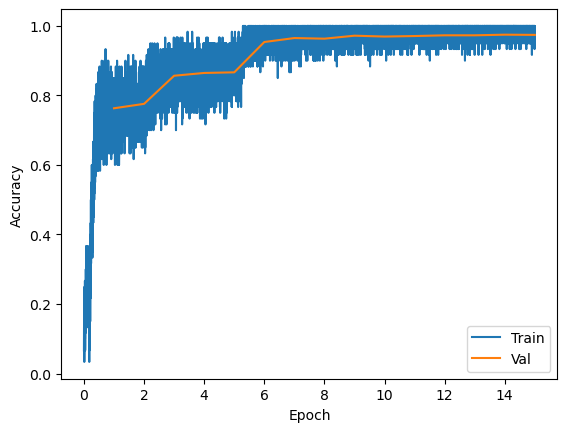

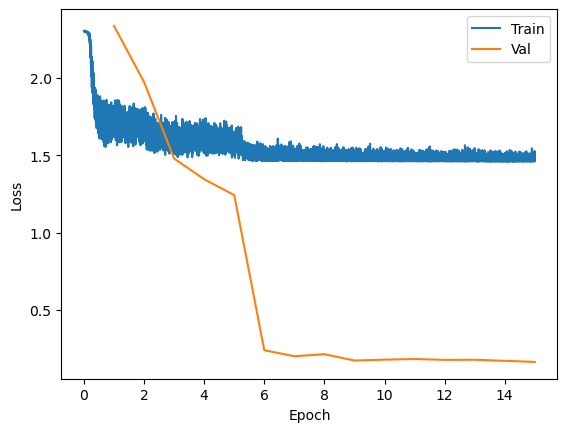

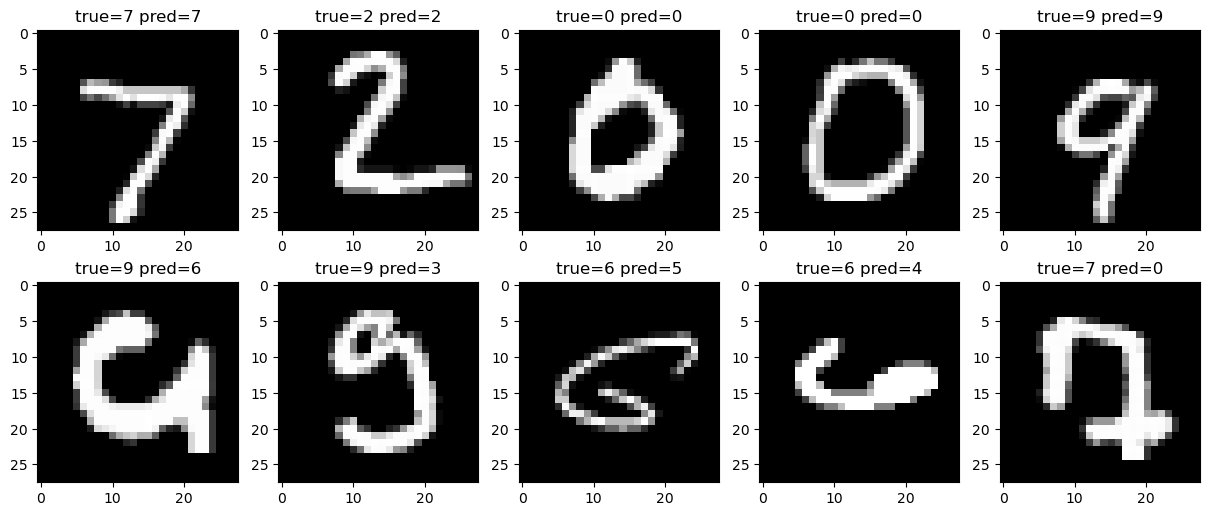

In [303]:

optimization_algo= torch.optim.SGD

lr = 1e-1
batch_size = 60 # The train set has 60000 images
num_epochs = 15

set_weights(model, weights_start)
t1= time.perf_counter()
M_2= run_mnist_training(model, num_epochs, lr, batch_size, device, optimization_algo)
print("Total Training Time : ", time.perf_counter() - t1, " s")
weights_2= get_weights(model)

# Visualization

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
dataset= datasets.MNIST("./data", train=True, download=True, transform=transform)
criterion= torch.nn.functional.cross_entropy

train_loader = torch.utils.data.DataLoader(
		dataset,
		batch_size=len(dataset),
		shuffle=False,
		pin_memory=torch.cuda.is_available(),
		drop_last=False,
		num_workers=4,
	)
X, y= next(iter(train_loader)) #Loading full dataset once to allow computing of the full loss of the model

In [ ]:

# Generate two random, orthogonal directions
with torch.no_grad():
	output = model(X)
	probas = model.compute_proba(output)
	loss = criterion(probas, y)	

	print("Loss of current minima : ", loss)
	
	weights_= get_weights(model)
	direction_1 = get_filterwise_normalized_direction(model)

	direction_2 = get_filterwise_normalized_direction(model)
	direction_2 -= torch.dot(direction_1, direction_2) * direction_1  # Make orthogonal

Launching computation for 8 chunks on 8 processes
parallel time :  23.403922299970873


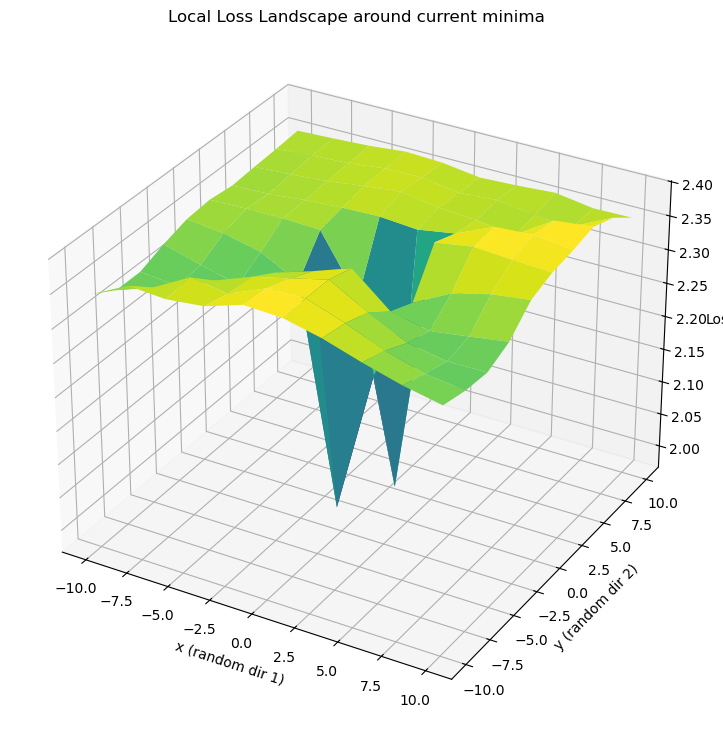

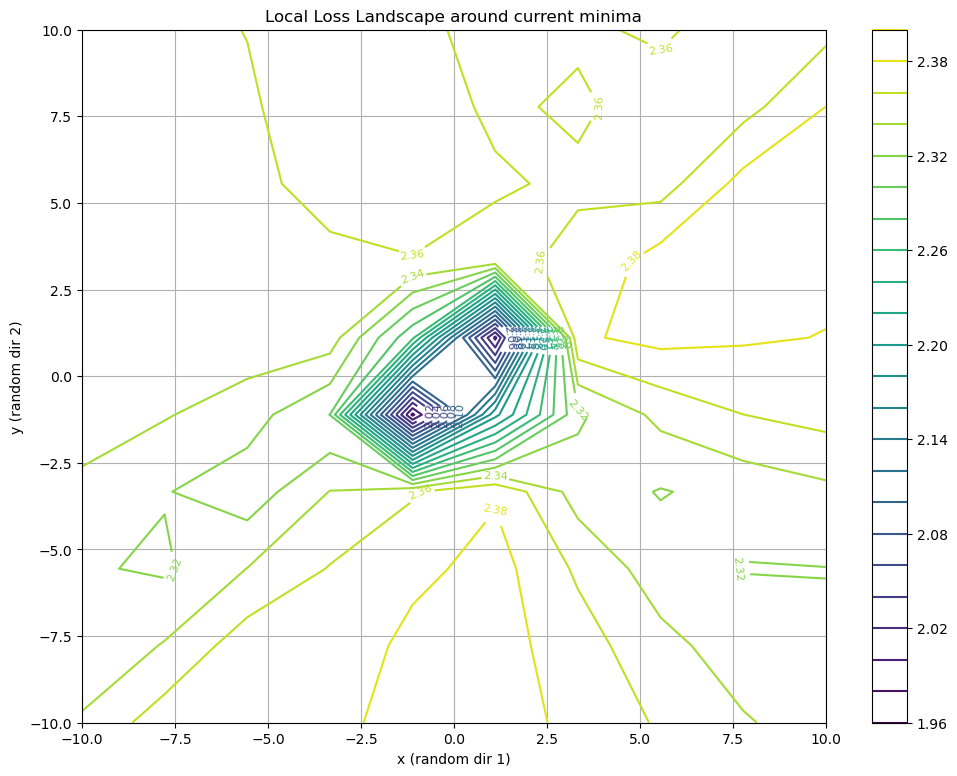

In [164]:
model_mem= copy.deepcopy(model)
with torch.no_grad():
	set_weights(model, weights_)
	x_grid= np.linspace(-10, 10, 10)
	y_grid= np.linspace(-10, 10, 10)
	t1= time.perf_counter()
	loss_surface= analyse_landscape_parallel(model, X, y, direction_1, direction_2, x_grid, y_grid)
	print("parallel time : ", time.perf_counter() - t1)

	x_grid_, y_grid_ = np.meshgrid(x_grid, y_grid, indexing='ij')
	fig = plt.figure(figsize=(12, 9))
	ax = fig.add_subplot(111, projection='3d')
	ax.plot_surface(x_grid_, y_grid_, loss_surface, cmap=cm.viridis)
	ax.set_xlabel('x (random dir 1)')
	ax.set_ylabel('y (random dir 2)')
	ax.set_zlabel('Loss')
	ax.set_title('Local Loss Landscape around current minima')
	plt.show()

	fig, ax = plt.subplots(figsize=(12, 9))
	contour= ax.contour(x_grid_, y_grid_, loss_surface, levels= 20)
	ax.clabel(contour, inline= True, fontsize= 8)
	ax.set_xlabel('x (random dir 1)')
	ax.set_ylabel('y (random dir 2)')
	ax.set_title('Local Loss Landscape around current minima')
	plt.grid()
	plt.colorbar(contour)
	plt.show()

In [306]:
set_weights(model, weights_2)
loss_surface_SGD, x_grid_SGD, y_grid_SGD, alphas_history_SGD, betas_history_SGD, pca_1_SGD, pca_2_SGD, explained_var_SGD= compute_traj_pca(model, X, y, M_2, num_epochs, n_points= 40)
set_weights(model, weights_)
loss_surface_ADAM, x_grid_ADAM, y_grid_ADAM, alphas_history_ADAM, betas_history_ADAM, pca_1_ADAM, pca_2_ADAM, explained_var_ADAM= compute_traj_pca(model, X, y, M, num_epochs, n_points= 40)

Launching computation for 8 chunks on 8 processes
Launching computation for 8 chunks on 8 processes


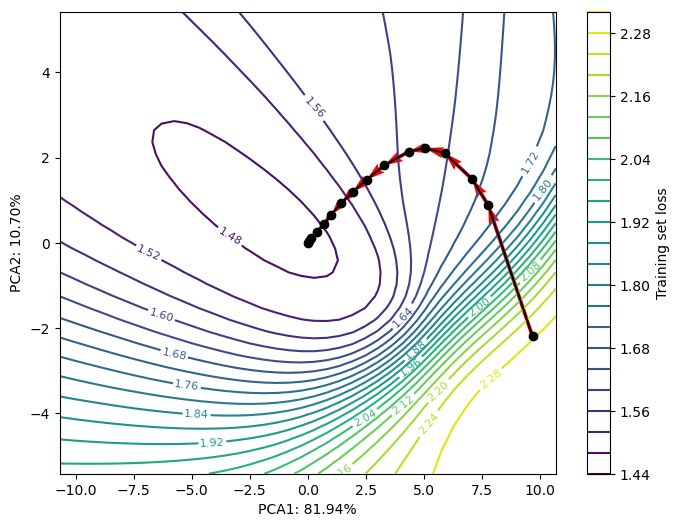

<Figure size 640x480 with 0 Axes>

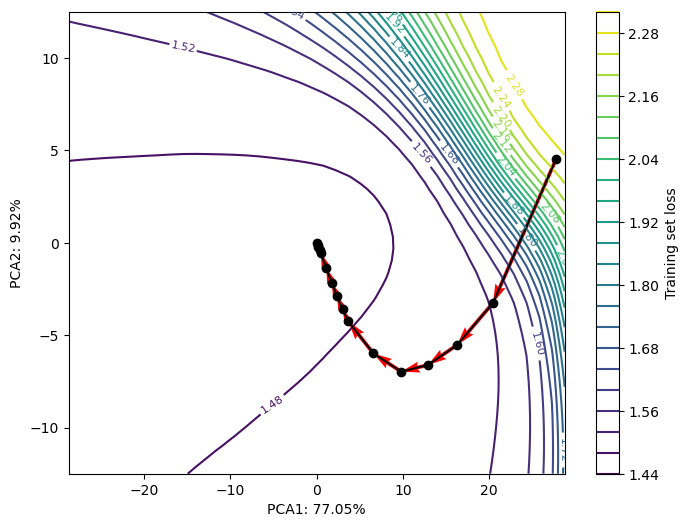

<Figure size 640x480 with 0 Axes>

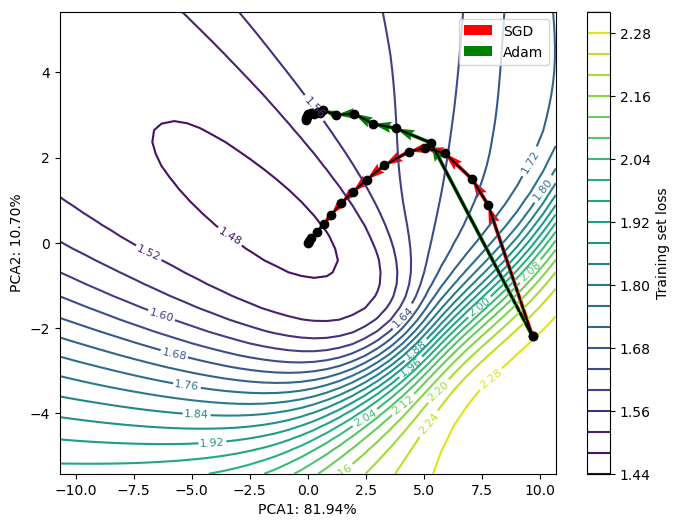

<Figure size 640x480 with 0 Axes>

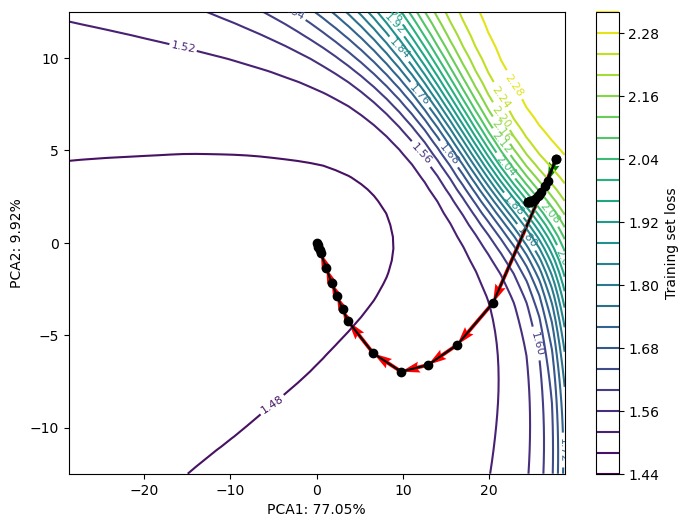

Distance (2-norm) between the two minimizers :  tensor(26.4490)
Angle between the two trajectoris :  1.1860201224074243


<Figure size 640x480 with 0 Axes>

In [334]:
alphas_history_ADAM_on_SGD= []
betas_history_ADAM_on_SGD= []
for i in range(num_epochs+1):
	alpha= torch.dot(torch.tensor(M[:, i] - np.array(weights_2)), torch.tensor(pca_1_SGD))
	beta= torch.dot(torch.tensor(M[:, i] - np.array(weights_2)), torch.tensor(pca_2_SGD))
	alphas_history_ADAM_on_SGD.append(alpha.item())
	betas_history_ADAM_on_SGD.append(beta.item())

alphas_history_SGD_on_ADAM= []
betas_history_SGD_on_ADAM= []
for i in range(num_epochs+1):
	alpha= torch.dot(torch.tensor(M_2[:, i] - np.array(weights_)), torch.tensor(pca_1_ADAM))
	beta= torch.dot(torch.tensor(M_2[:, i] - np.array(weights_)), torch.tensor(pca_2_ADAM))
	alphas_history_SGD_on_ADAM.append(alpha.item())
	betas_history_SGD_on_ADAM.append(beta.item())

fig, ax = plt.subplots(figsize=(8, 6))
contour= ax.contour(x_grid_SGD, y_grid_SGD, loss_surface_SGD, levels= 20)
ax.clabel(contour, inline= True, fontsize= 8)
plt.colorbar(contour, label= "Training set loss")
plt.plot(alphas_history_SGD, betas_history_SGD, marker='o', color= "black")
plt.quiver(alphas_history_SGD[:-1], betas_history_SGD[:-1], 
		[a2 - a1 for a1, a2 in zip(alphas_history_SGD[:-1], alphas_history_SGD[1:])],
		[b2 - b1 for b1, b2 in zip(betas_history_SGD[:-1], betas_history_SGD[1:])],
		scale_units='xy', angles='xy', scale=1, color='red',  label= "SGD")
plt.xlabel(f"PCA1: {explained_var_SGD[0]*100:.2f}%")
plt.ylabel(f"PCA2: {explained_var_SGD[1]*100:.2f}%")
plt.show()
plt.savefig("Figures/SGD_traj.jpg", format= "jpg", dpi= 300)

fig, ax = plt.subplots(figsize=(8, 6))
contour= ax.contour(x_grid_ADAM, y_grid_ADAM, loss_surface_ADAM, levels= 20)
ax.clabel(contour, inline= True, fontsize= 8)
plt.colorbar(contour, label= "Training set loss")
plt.plot(alphas_history_ADAM, betas_history_ADAM, marker='o', color= "black")
plt.quiver(alphas_history_ADAM[:-1], betas_history_ADAM[:-1], 
		[a2 - a1 for a1, a2 in zip(alphas_history_ADAM[:-1], alphas_history_ADAM[1:])],
		[b2 - b1 for b1, b2 in zip(betas_history_ADAM[:-1], betas_history_ADAM[1:])],
		scale_units='xy', angles='xy', scale=1, color='red',  label= "ADAM")
plt.xlabel(f"PCA1: {explained_var_ADAM[0]*100:.2f}%")
plt.ylabel(f"PCA2: {explained_var_ADAM[1]*100:.2f}%")
plt.show()
plt.savefig("Figures/ADAM_traj.jpg", format= "jpg", dpi= 300)


fig, ax = plt.subplots(figsize=(8, 6))
contour= ax.contour(x_grid_SGD, y_grid_SGD, loss_surface_SGD, levels= 20)
ax.clabel(contour, inline= True, fontsize= 8)
plt.colorbar(contour, label= "Training set loss")
plt.plot(alphas_history_SGD, betas_history_SGD, marker='o', color= "black")
plt.quiver(alphas_history_SGD[:-1], betas_history_SGD[:-1], 
		[a2 - a1 for a1, a2 in zip(alphas_history_SGD[:-1], alphas_history_SGD[1:])],
		[b2 - b1 for b1, b2 in zip(betas_history_SGD[:-1], betas_history_SGD[1:])],
		scale_units='xy', angles='xy', scale=1, color='red',  label= "SGD")
plt.plot(alphas_history_ADAM_on_SGD, betas_history_ADAM_on_SGD, marker='o', color= "black")
plt.quiver(alphas_history_ADAM_on_SGD[:-1], betas_history_ADAM_on_SGD[:-1], 
		[a2 - a1 for a1, a2 in zip(alphas_history_ADAM_on_SGD[:-1], alphas_history_ADAM_on_SGD[1:])],
		[b2 - b1 for b1, b2 in zip(betas_history_ADAM_on_SGD[:-1], betas_history_ADAM_on_SGD[1:])],
		scale_units='xy', angles='xy', scale=1, color='green',  label= "Adam")
plt.xlabel(f"PCA1: {explained_var_SGD[0]*100:.2f}%")
plt.ylabel(f"PCA2: {explained_var_SGD[1]*100:.2f}%")
plt.legend()
plt.show()
plt.savefig("Figures/ADAM_on_SGD_traj.jpg", format= "jpg", dpi= 300)


fig, ax = plt.subplots(figsize=(8, 6))
contour= ax.contour(x_grid_ADAM, y_grid_ADAM, loss_surface_ADAM, levels= 20)
ax.clabel(contour, inline= True, fontsize= 8)
plt.colorbar(contour, label= "Training set loss")
plt.plot(alphas_history_ADAM, betas_history_ADAM, marker='o', color= "black")
plt.quiver(alphas_history_ADAM[:-1], betas_history_ADAM[:-1], 
		[a2 - a1 for a1, a2 in zip(alphas_history_ADAM[:-1], alphas_history_ADAM[1:])],
		[b2 - b1 for b1, b2 in zip(betas_history_ADAM[:-1], betas_history_ADAM[1:])],
		scale_units='xy', angles='xy', scale=1, color='red',  label= "ADAM")
plt.plot(alphas_history_SGD_on_ADAM, betas_history_SGD_on_ADAM, marker='o', color= "black")
plt.quiver(alphas_history_SGD_on_ADAM[:-1], betas_history_SGD_on_ADAM[:-1], 
		[a2 - a1 for a1, a2 in zip(alphas_history_SGD_on_ADAM[:-1], alphas_history_SGD_on_ADAM[1:])],
		[b2 - b1 for b1, b2 in zip(betas_history_SGD_on_ADAM[:-1], betas_history_SGD_on_ADAM[1:])],
		scale_units='xy', angles='xy', scale=1, color='green',  label= "SGD")
plt.xlabel(f"PCA1: {explained_var_ADAM[0]*100:.2f}%")
plt.ylabel(f"PCA2: {explained_var_ADAM[1]*100:.2f}%")
plt.show()
plt.savefig("Figures/SGD_on_ADAM_traj.jpg", format= "jpg", dpi= 300)


print("Distance (2-norm) between the two minimizers : ", torch.norm(weights_ - weights_2, p=2))
print("Angle between the two trajectoris : ", np.arccos(torch.dot(torch.tensor(np.array(weights_) - M[:, 0]), torch.tensor(np.array(weights_2) - M_2[:, 0])).item()/(torch.norm(torch.tensor(np.array(weights_) - M[:, 0]), p=2).item() * torch.norm(torch.tensor(np.array(weights_2) - M_2[:, 0]), p=2).item())))

In [332]:
combined_M= np.concatenate([M, M_2], axis=1)
centered= np.zeros_like(combined_M)
for i in range(2*(num_epochs + 1)):
	centered[:, i]= combined_M[:, i] - M[:, 0]
pca_joint= PCA(n_components=2).fit(centered.T)
dir1= pca_joint.components_[0]
dir2= pca_joint.components_[1]

alphas_SGD_combined= []
betas_SGD_combined= []
for i in range(num_epochs+1):
	alpha= torch.dot(torch.tensor(M_2[:, i] - M[:, 0]), torch.tensor(dir1))
	beta= torch.dot(torch.tensor(M_2[:, i] - M[:, 0]), torch.tensor(dir2))
	alphas_SGD_combined.append(alpha.item())
	betas_SGD_combined.append(beta.item())

alphas_ADAM_combined= []
betas_ADAM_combined= []
for i in range(num_epochs+1):
	alpha= torch.dot(torch.tensor(M[:, i] - M[:, 0]), torch.tensor(dir1))
	beta= torch.dot(torch.tensor(M[:, i] - M[:, 0]), torch.tensor(dir2))
	alphas_ADAM_combined.append(alpha.item())
	betas_ADAM_combined.append(beta.item())

print(sclg.norm(M[:, 0] - M_2[:, 0], ord= 2))

x_grid= np.linspace(-30, 5, 30)
y_grid= np.linspace(-5, 7, 30)
set_weights(model, weights_start)
loss_surface= analyse_landscape(model, X, y, dir1, dir2, x_grid, y_grid)

0.0


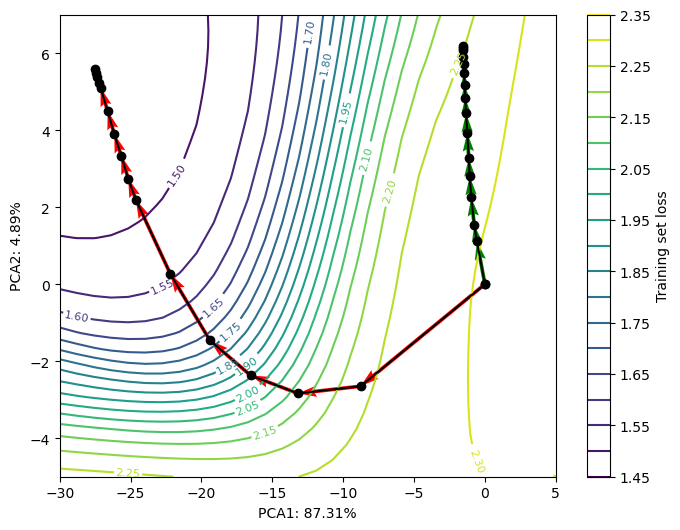

In [333]:
x_grid_, y_grid_ = np.meshgrid(x_grid, y_grid, indexing='ij')
explained_var= pca_joint.explained_variance_ratio_


fig, ax = plt.subplots(figsize=(8, 6))
contour= ax.contour(x_grid_, y_grid_, loss_surface, levels= 20)
ax.clabel(contour, inline= True, fontsize= 8)
plt.colorbar(contour, label= "Training set loss")
plt.plot(alphas_ADAM_combined, betas_ADAM_combined, marker='o', color= "black")
plt.quiver(alphas_ADAM_combined[:-1], betas_ADAM_combined[:-1], 
		[a2 - a1 for a1, a2 in zip(alphas_ADAM_combined[:-1], alphas_ADAM_combined[1:])],
		[b2 - b1 for b1, b2 in zip(betas_ADAM_combined[:-1], betas_ADAM_combined[1:])],
		scale_units='xy', angles='xy', scale=1, color='red',  label= "ADAM")
plt.plot(alphas_SGD_combined, betas_SGD_combined, marker='o', color= "black")
plt.quiver(alphas_SGD_combined[:-1], betas_SGD_combined[:-1], 
		[a2 - a1 for a1, a2 in zip(alphas_SGD_combined[:-1], alphas_SGD_combined[1:])],
		[b2 - b1 for b1, b2 in zip(betas_SGD_combined[:-1], betas_SGD_combined[1:])],
		scale_units='xy', angles='xy', scale=1, color='green',  label= "SGD")
plt.xlabel(f"PCA1: {explained_var[0]*100:.2f}%")
plt.ylabel(f"PCA2: {explained_var[1]*100:.2f}%")
plt.show()

Train Epoch: 1-0 batch_loss=3.10e-03 batch_acc=0.593
Train Epoch: 1-10 batch_loss=3.17e-03 batch_acc=0.560
Train Epoch: 1-20 batch_loss=3.02e-03 batch_acc=0.650
Train Epoch: 1-30 batch_loss=2.89e-03 batch_acc=0.727
Train Epoch: 1-40 batch_loss=2.92e-03 batch_acc=0.708
Train Epoch: 1-50 batch_loss=2.86e-03 batch_acc=0.747
Train Epoch: 1-60 batch_loss=2.88e-03 batch_acc=0.735
Train Epoch: 1-70 batch_loss=2.82e-03 batch_acc=0.768
Train Epoch: 1-80 batch_loss=2.84e-03 batch_acc=0.755
Train Epoch: 1-90 batch_loss=2.82e-03 batch_acc=0.770
Test set: Average loss: 41.9165, Accuracy: 7601/10000 (76%)
Train Epoch: 2-0 batch_loss=2.80e-03 batch_acc=0.780
Train Epoch: 2-10 batch_loss=2.81e-03 batch_acc=0.772
Train Epoch: 2-20 batch_loss=2.82e-03 batch_acc=0.773
Train Epoch: 2-30 batch_loss=2.84e-03 batch_acc=0.758
Train Epoch: 2-40 batch_loss=2.93e-03 batch_acc=0.703
Train Epoch: 2-50 batch_loss=2.95e-03 batch_acc=0.688
Train Epoch: 2-60 batch_loss=2.85e-03 batch_acc=0.748
Train Epoch: 2-70 batch_

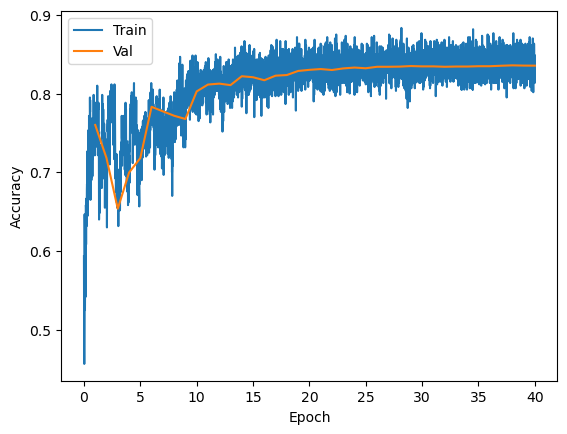

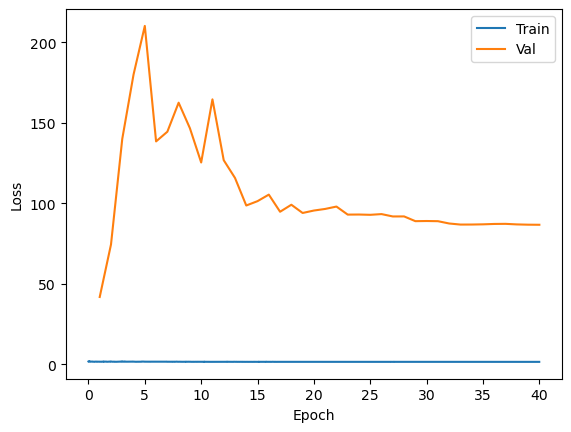

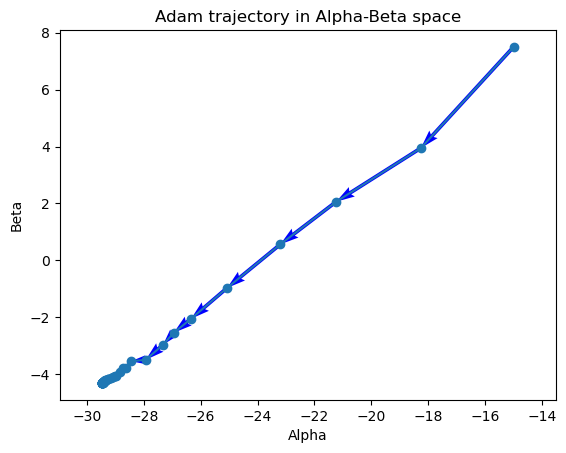

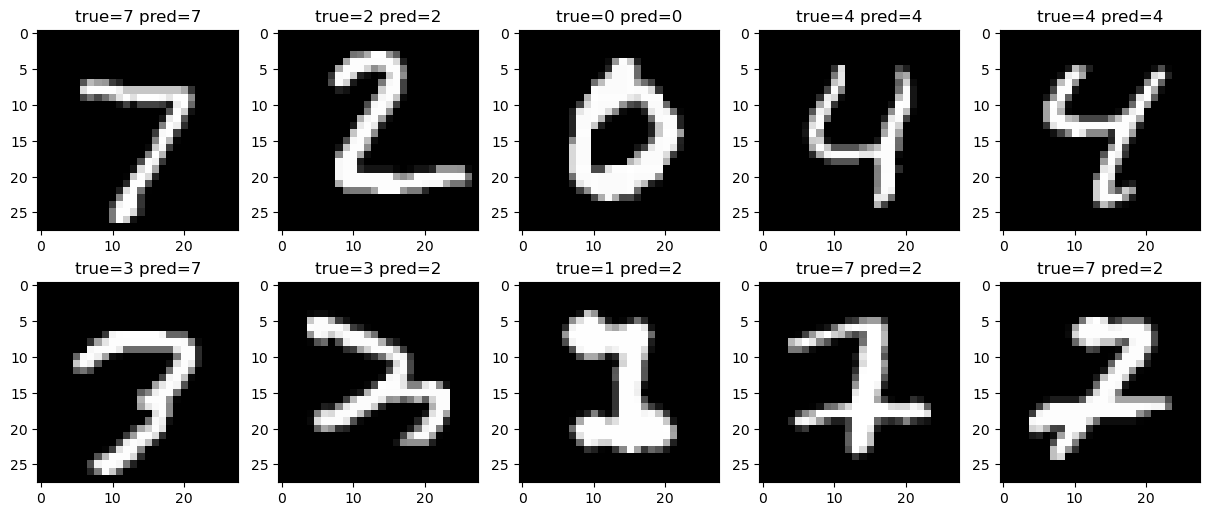

In [264]:
alpha= -15
beta= 7.5
with torch.no_grad():
	custom_init= weights_ + alpha*pca_1 + beta*pca_2

optimization_algo= torch.optim.Adam
if optimization_algo == torch.optim.SGD :
	lr = 1e-1
	batch_size = 60 # The train set has 60000 images
	num_epochs = 10
else : # if Adam
	lr = 1e-2
	batch_size = 600 # The train set has 60000 images
	num_epochs = 10

num_epochs=40
M_2= retrain_on_new_w(model, num_epochs, lr, batch_size, device, optimization_algo, custom_init, weights_, torch.tensor(pca_1, dtype=torch.float32), torch.tensor(pca_2, dtype=torch.float32), alpha, beta)

In [268]:
alphas_history= []
betas_history= []
n_points= 40
for i in range(num_epochs+1):
	alpha= torch.dot(torch.tensor(M_2[:, i] - M_2[:, -1]), torch.tensor(pca_1))
	beta= torch.dot(torch.tensor(M_2[:, i] - M_2[:, -1]), torch.tensor(pca_2))
	alphas_history.append(alpha.item())
	betas_history.append(beta.item())
	
	x_grid= np.linspace(- 15, 15, n_points)
	y_grid= np.linspace(- 10, 10, n_points)
set_weights(model, torch.tensor(M_2[:, -1], dtype= torch.float32))
loss_surface= analyse_landscape_parallel(model, X, y, pca_1, pca_2, x_grid, y_grid)
x_grid_, y_grid_ = np.meshgrid(x_grid, y_grid, indexing='ij')

Launching computation for 8 chunks on 8 processes


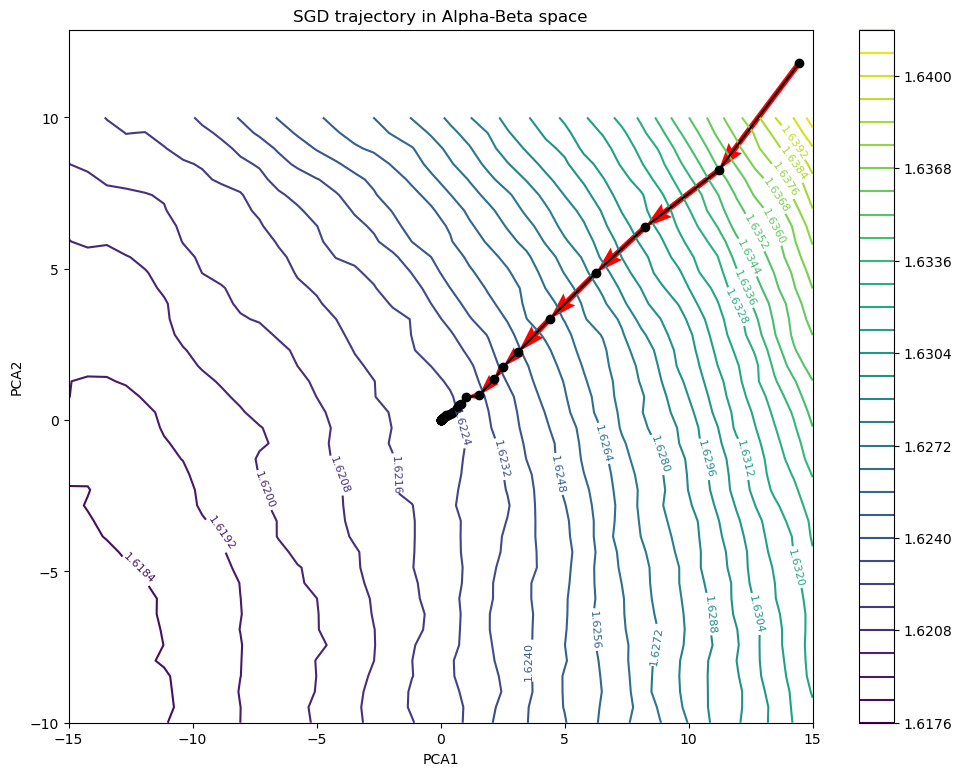

In [269]:
fig, ax = plt.subplots(figsize=(12, 9))
contour= ax.contour(x_grid_, y_grid_, loss_surface, levels= 30)
ax.clabel(contour, inline= True, fontsize= 8)
plt.colorbar(contour)
plt.plot(alphas_history, betas_history, marker='o', color= "black")
plt.quiver(alphas_history[:-1], betas_history[:-1], 
		[a2 - a1 for a1, a2 in zip(alphas_history[:-1], alphas_history[1:])],
		[b2 - b1 for b1, b2 in zip(betas_history[:-1], betas_history[1:])],
		scale_units='xy', angles='xy', scale=1, color='red')
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("SGD trajectory in Alpha-Beta space")
plt.show()


In [256]:
with torch.no_grad():
	x_grid= np.linspace(-100, 100, 40)
	y_grid= np.linspace(-100, 100, 40)
	t1= time.perf_counter()
	loss_surface= analyse_landscape_parallel(model, X, y, pca_1, pca_2, x_grid, y_grid)
	print("parallel time : ", time.perf_counter() - t1)

	x_grid_, y_grid_ = np.meshgrid(x_grid, y_grid, indexing='ij')
	fig = plt.figure(figsize=(12, 9))
	ax = fig.add_subplot(111, projection='3d')
	ax.plot_surface(x_grid_, y_grid_, loss_surface, cmap=cm.viridis)
	ax.set_xlabel('x (PCA1)')
	ax.set_ylabel('y (PCA2)')
	ax.set_zlabel('Loss')
	ax.set_title('Local Loss Landscape around current minima')
	plt.show()

	fig, ax = plt.subplots(figsize=(12, 9))
	contour= ax.contour(x_grid_, y_grid_, loss_surface, levels= 20)
	ax.clabel(contour, inline= True, fontsize= 8)
	ax.set_xlabel('x (PCA1)')
	ax.set_ylabel('y (PCA2)')
	ax.set_title('Local Loss Landscape around current minima')
	plt.grid()
	plt.colorbar(contour)
	plt.show()

Launching computation for 8 chunks on 8 processes


KeyboardInterrupt: 